In [1]:
## importing libraries
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import os
import matplotlib.pyplot as plt
get_ipython().magic('matplotlib inline')
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
## reading files
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
#checking for NA values in train and test
print(train.isna().sum(),test.isna().sum())

id                       0
timestamp                0
full_sq                  0
life_sq               6383
floor                  167
                      ... 
mosque_count_5000        0
leisure_count_5000       0
sport_count_5000         0
market_count_5000        0
price_doc                0
Length: 292, dtype: int64 id                       0
timestamp                0
full_sq                  0
life_sq               1176
floor                    0
                      ... 
church_count_5000        0
mosque_count_5000        0
leisure_count_5000       0
sport_count_5000         0
market_count_5000        0
Length: 291, dtype: int64


In [4]:
#Dropping column id from train, not helpful in prediction
train.drop(columns=['id'], inplace=True)
#print(train)

In [5]:
test.drop(columns=['id'], inplace=True)
#print(test)

In [4]:
## missing values imputation in train
for i in train.columns:
    if train[i].dtype == 'object':
      train[i] = train[i].fillna(train[i].mode().iloc[0])
    if (train[i].dtype == 'int' or train[i].dtype == 'float'):
      train[i] = train[i].fillna(np.mean(train[i]))

In [5]:
## missing values imputation in test
for i in test.columns:
    if test[i].dtype == 'object':
      test[i] = test[i].fillna(test[i].mode().iloc[0])
    if (test[i].dtype == 'int' or test[i].dtype == 'float'):
      test[i] = test[i].fillna(np.mean(test[i]))

In [6]:
## label encoding for categorial variables in train
number = LabelEncoder()
for i in train.columns:
    if (train[i].dtype == 'object'):
      train[i] = number.fit_transform(train[i].astype('str'))
      train[i] = train[i].astype('object')

In [7]:
## label encoding for categorial variables in test
for i in test.columns:
    if (test[i].dtype == 'object'):
      test[i] = number.fit_transform(test[i].astype('str'))
      test[i] = test[i].astype('object')

In [8]:
## creating a new feature origin
train['origin'] = 0                               # fix origin = 0 for all row in train
test['origin'] = 1                                # fix origin = 1 for all row in train
training = train.drop('price_doc',axis=1)         #droping target variable

In [9]:
## taking sample from training and test data
training = training.sample(7662, random_state=12)                 # a random sample selection from train
testing = test.sample(7000, random_state=11)                      # a random sample selection from test

In [10]:
## combining random samples
combi = training.append(testing)
y = combi['origin']
combi.drop('origin',axis=1,inplace=True)              # dropping column Origin

In [11]:
## defining and fitting model
model = RandomForestClassifier(n_estimators = 50, max_depth = 5,min_samples_leaf = 5)
drop_list = []                                           # initalise an array
for i in combi.columns:
    score = cross_val_score(model,pd.DataFrame(combi[i]),y,cv=2,scoring='roc_auc')           #taking one feature at a time and calculation roc_auc score
    if (np.mean(score) > 0.8):                           
        drop_list.append(i)                             # apend array drop_list for each feature scoring roc_auc more than treshold 0.8
    #print(i,np.mean(score))
print(drop_list)


market_count_5000 0.5617835887683187
['id', 'timestamp', 'life_sq', 'kitch_sq', 'hospital_beds_raion', 'cafe_sum_500_min_price_avg', 'cafe_sum_500_max_price_avg', 'cafe_avg_price_500']


C:\Users\HP\anaconda\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


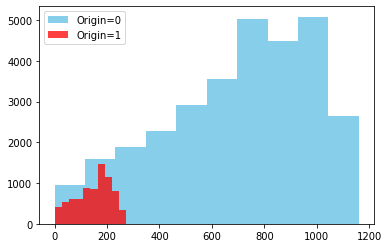

In [15]:
#Plotting histogram of drifting features to visualize the data shift
train['Origin'] = 0                        # defining Origin = 0 for train data
test['Origin'] = 1                         # defining Origin = 1 for train data
combine_df=pd.concat([train,test], axis=0, ignore_index=True)              # concating both train and test as combine_df dataset
plt.hist(combine_df.loc[combine_df['Origin'] == 0,"timestamp"], color="skyblue", label="Origin=0")
plt.hist(combine_df.loc[combine_df['Origin'] == 1,"timestamp"],color="red",alpha=.75, label="Origin=1")
plt.legend()
plt.show()



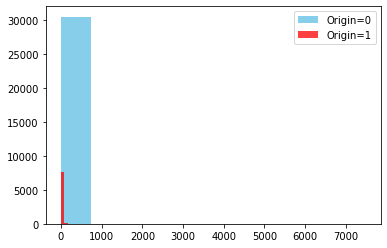

In [32]:
#Plotting histogram with life_sq feature to show the drift

plt.hist(combine_df.loc[combine_df['Origin'] == 0,"life_sq"], color="skyblue", label="Origin=0")
plt.hist(combine_df.loc[combine_df['Origin'] == 1,"life_sq"],color="red",alpha=.75, label="Origin=1")
plt.legend()
plt.show()

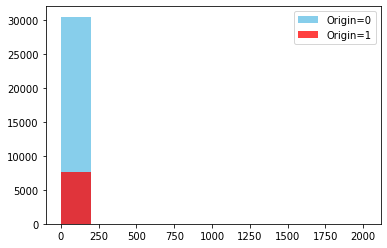

In [33]:
#Plotting histogram with kitch_sq feature to show the drift

plt.hist(combine_df.loc[combine_df['Origin'] == 0,"kitch_sq"], color="skyblue", label="Origin=0")
plt.hist(combine_df.loc[combine_df['Origin'] == 1,"kitch_sq"],color="red",alpha=.75, label="Origin=1")
plt.legend()
plt.show()

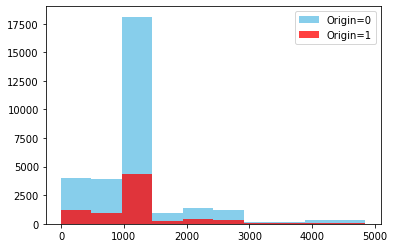

In [34]:
#Plotting histogram with hospital_beds_raion feature to show the drift

plt.hist(combine_df.loc[combine_df['Origin'] == 0,"hospital_beds_raion"], color="skyblue", label="Origin=0")
plt.hist(combine_df.loc[combine_df['Origin'] == 1,"hospital_beds_raion"],color="red",alpha=.75, label="Origin=1")
plt.legend()
plt.show()

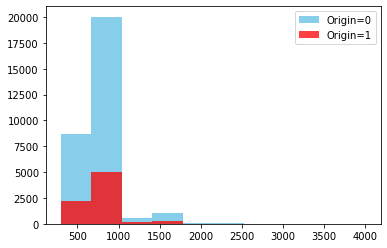

In [35]:
#Plotting histogram with cafe_sum_500_min_price_avg feature to show the drift

plt.hist(combine_df.loc[combine_df['Origin'] == 0,"cafe_sum_500_min_price_avg"], color="skyblue", label="Origin=0")
plt.hist(combine_df.loc[combine_df['Origin'] == 1,"cafe_sum_500_min_price_avg"],color="red",alpha=.75, label="Origin=1")
plt.legend()
plt.show()

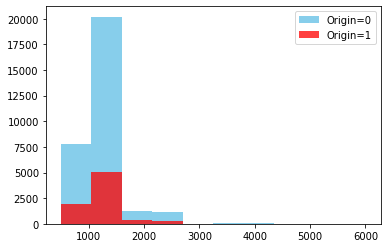

In [36]:
#Plotting histogram with cafe_sum_500_max_price_avg feature to show the drift

plt.hist(combine_df.loc[combine_df['Origin'] == 0,"cafe_sum_500_max_price_avg"], color="skyblue", label="Origin=0")
plt.hist(combine_df.loc[combine_df['Origin'] == 1,"cafe_sum_500_max_price_avg"],color="red",alpha=.75, label="Origin=1")
plt.legend()
plt.show()

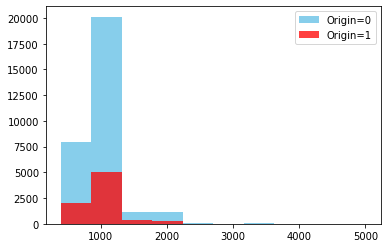

In [37]:
#Plotting histogram with cafe_avg_price_500 feature to show the drift

plt.hist(combine_df.loc[combine_df['Origin'] == 0,"cafe_avg_price_500"], color="skyblue", label="Origin=0")
plt.hist(combine_df.loc[combine_df['Origin'] == 1,"cafe_avg_price_500"],color="red",alpha=.75, label="Origin=1")
plt.legend()
plt.show()

In [12]:
#Now we will train our model for checking accuracy with drift feature

## taking sample from train and test data
train_with_drift = train.sample(7662, random_state=12)
test_with_drift = test.sample(7000, random_state=11)

# defining an array labels, containing the values we want to predict
labels = np.array(train_with_drift['price_doc'])

# removing target variable to equate number of features in both train_with_drift & test_with_drift aataset
train_with_drift= train_with_drift.drop('price_doc', axis = 1)


# creating a list of features
train_with_drift_list = list(train_with_drift.columns)

# converting into an array
train_with_drift = np.array(train_with_drift)

In [13]:
# Splitting the data into 4 subsets for fitting our model, with 25% each
train_features, test_features, train_labels, test_labels = train_test_split(train_with_drift, labels, test_size = 0.25, random_state = 40)

# Instantiate model with 100 decision trees
rf = RandomForestRegressor(n_estimators = 100, random_state = 10)

# fitting model random forest on train subsets
rf.fit(train_features, train_labels);

In [14]:
# applying trained model on test for checking accuracy
predictions = rf.predict(test_features)

# calculating absolute errors
errors = abs(predictions - test_labels)

# calculating mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)

# Calculate and display accuracy of prediction 
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 61.16 %.


In [15]:
# plotting 20 features covering important informance for prediction
features = train.drop('price_doc',axis=1).columns.values
imp = rf.feature_importances_
indices = np.argsort(imp)[::-1][:20]

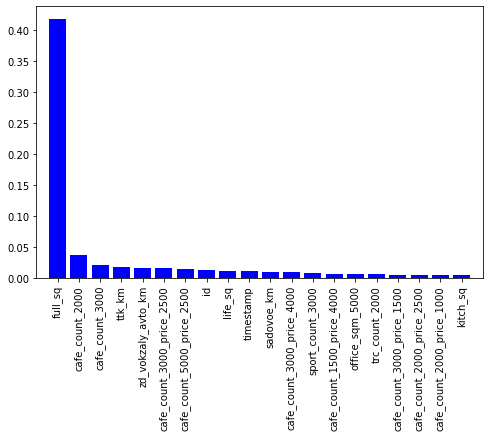

In [16]:
#plotting 20 such features containing maximum information for prediction
plt.figure(figsize=(8,5))
plt.bar(range(len(indices)), imp[indices], color = 'b', align='center')
plt.xticks(range(len(indices)), features[indices], rotation='vertical')
plt.xlim([-1,len(indices)])
plt.show()

In [17]:
## manully checked for features not coming dropping drifting features which are not important.
drift_train = training.drop(['id','hospital_beds_raion','cafe_sum_500_min_price_avg','cafe_sum_500_max_price_avg','cafe_avg_price_500'], axis=1)
drift_test = testing.drop(['id','hospital_beds_raion','cafe_sum_500_min_price_avg','cafe_sum_500_max_price_avg','cafe_avg_price_500'], axis=1)

In [18]:
# Splitting the data into 4 subsets for fitting our model, with 25% each
drift_train_features, drift_test_features, drift_train_labels, drift_test_labels = train_test_split(drift_train, labels, test_size = 0.25, random_state = 40)

# Instantiate model with 100 decision trees
drf = RandomForestRegressor(n_estimators = 100, random_state = 10)

# fitting model random forest on train subsets
drf.fit(drift_train_features, drift_train_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=10, verbose=0,
                      warm_start=False)

In [19]:
# # applying trained model on test for checking accuracy
drf_predictions = drf.predict(drift_test_features)

# calculating the absolute errors
drf_errors = abs(drf_predictions - drift_test_labels)

# calculating mean absolute percentage error (MAPE)
drf_mape = 100 * (drf_errors / drift_test_labels)

# Calculate and display accuracy of prediction 
drf_accuracy = 100 - np.mean(drf_mape)
print(' Accuracy score after remove drift feature:', round(drf_accuracy, 2), '%.')

 Accuracy score after remove drift feature: 61.13 %.
